# 【練習問題】自動車の走行距離予測

[リンク](https://signate.jp/competitions/121)

やってみたけど、まったく歯が立たたない  
解くのに何が必要なのかもわからない

[｢自動車の走行距離予測｣に挑戦した話+上手く行かなかった事｡ - Explore _Full-Stack_ in depth!](https://drumato.hatenablog.com/entry/2018/10/12/233630)

>課題種別としては多変量回帰問題に分類されます｡

そもそも回帰って何だ  
[多変量解析の手法 _ データ分析基礎知識](https://www.albert2005.co.jp/knowledge/statistics_analysis/multivariate_analysis/multivariate_method)


SIGNATEの、データのロードから提出まで一連の流れを上のリンクの人がGitLab公開してくれている  
[Drumato / SIGNATE_practice](https://gitlab.com/Drumato/SIGNATE_predict_car_mileage)

ノートをGitLabで開くとやたら重いので、Colaboratoryでレンダリング  
[xgboost.ipynb - Google Colaboratory](https://colab.research.google.com/github/Drumato/SIGNATE_practice/blob/master/car_mpg/input/xgboost.ipynb)

----
以下上リンクのコピペ


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing as prc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [136]:
train_df = pd.read_csv('D:/Python/Jupyter/ds/train.tsv', sep='\t',encoding='utf-8')
test_df = pd.read_csv('D:/Python/Jupyter/ds/test.tsv', sep='\t', encoding='utf-8')

In [137]:
# 目的変数を退避
target = train_df['mpg']

In [138]:
# merge train and test
total_df = pd.concat([train_df.drop('mpg',axis=1),test_df])
total_df.reset_index(drop=True,inplace=True)
total_df.reset_index(inplace=True)
total_df.head()

,index,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,1,3,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,2,9,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,3,11,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,4,13,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [139]:
# 車名を排除
total_df.drop('car name',axis=1,inplace=True)

In [140]:
total_df.describe()

,index,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,195.500000,198.278061,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,113.304898,115.266207,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,0.000000,0.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,97.750000,98.750000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,195.500000,197.500000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,293.250000,298.250000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,391.000000,397.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [141]:
# 重さと排気量の幅が大きいので、最大最小スケーリング
prc.minmax_scale(total_df['weight'], copy=False)
prc.minmax_scale(total_df['displacement'],copy=False)

array([0.17312661, 0.05426357, 0.22739018, 0.05684755, 0.05426357,
       0.21447028, 0.47028424, 0.72868217, 0.1369509 , 0.64599483,
       0.25839793, 0.09560724, 0.0749354 , 0.72868217, 0.42377261,
       0.07235142, 0.07751938, 0.07751938, 0.18863049, 0.25839793,
       0.13953488, 0.60465116, 0.10335917, 0.6124031 , 0.34108527,
       0.85788114, 0.17312661, 0.47028424, 0.50129199, 0.07751938,
       0.47028424, 0.05426357, 0.02842377, 0.1369509 , 0.00775194,
       0.49095607, 0.0749354 , 0.13436693, 0.18604651, 0.05684755,
       0.17312661, 0.42377261, 0.42377261, 0.13953488, 0.18604651,
       0.72868217, 0.40568475, 0.03359173, 0.05943152, 0.12403101,
       0.47028424, 0.13178295, 0.11369509, 0.18604651, 0.13178295,
       0.75452196, 0.05167959, 0.60981912, 0.10335917, 0.05684755,
       0.1369509 , 0.05426357, 0.73126615, 0.13436693, 0.0749354 ,
       0.18604651, 0.72868217, 0.60465116, 0.99741602, 0.07751938,
       0.12403101, 0.13178295, 0.17312661, 0.29198966, 0.93281

In [142]:
research = train_df.copy() #テストデータのパターンを分析しないように訓練データから複製したものでデータ分析

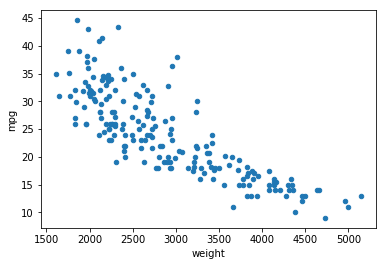

In [143]:
#重い程燃費が悪い
research.plot(kind='scatter', x='weight', y='mpg')

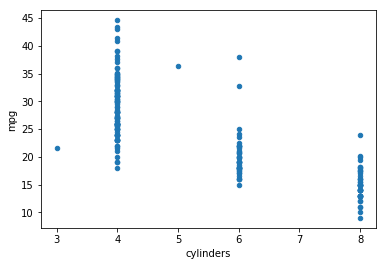

In [144]:
#シリンダー数が多い程燃費は悪くなる
research.plot(kind='scatter',x='cylinders',y='mpg')

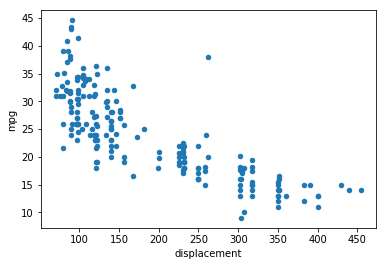

In [145]:
#変位が大きい程燃費が悪くなる
research.plot(kind='scatter',x='displacement',y='mpg')

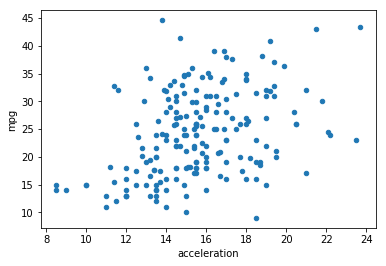

In [146]:
#わずかに正の相関&ばらつきが強い
research.plot(kind='scatter',x='acceleration',y='mpg')

In [147]:
#新しければ燃費がよくなる,
research.corr()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
id,1.000000,-0.066567,0.109526,0.109085,0.083254,0.086323,-0.088383,-0.082099,-0.034860
mpg,-0.066567,1.000000,-0.773889,-0.806195,-0.791419,-0.821364,0.384631,0.569926,0.535130
cylinders,0.109526,-0.773889,1.000000,0.950627,0.851572,0.894891,-0.473792,-0.300641,-0.504343
displacement,0.109085,-0.806195,0.950627,1.000000,0.894965,0.933037,-0.522269,-0.330437,-0.585637
horsepower,0.083254,-0.791419,0.851572,0.894965,1.000000,0.872336,-0.661741,-0.384597,-0.421929
weight,0.086323,-0.821364,0.894891,0.933037,0.872336,1.000000,-0.401164,-0.269779,-0.540432
acceleration,-0.088383,0.384631,-0.473792,-0.522269,-0.661741,-0.401164,1.000000,0.191584,0.202153
model year,-0.082099,0.569926,-0.300641,-0.330437,-0.384597,-0.269779,0.191584,1.000000,0.121555
origin,-0.034860,0.535130,-0.504343,-0.585637,-0.421929,-0.540432,0.202153,0.121555,1.000000


In [148]:
# 抽出条件
train_df = total_df.query('index <= 194')
test_df = total_df.query('index > 194')

train_X = train_df.drop(['id'], axis=1)
train_y = target
test_X = test_df.drop(['id'], axis=1)

In [149]:
linregmodel = LinearRegression()
linregmodel.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
# Predict
train_y_pred = linregmodel.predict(train_X)
test_y_pred = linregmodel.predict(test_X)

In [151]:
# 訓練データに対するスコアを確認
train_acc = np.sqrt(mean_squared_error(train_y,train_y_pred))
print(f'train accuracy:{train_acc}')

train accuracy:3.212062765438651


In [152]:
test_df = pd.read_csv('D:/Python/Jupyter/ds/test.tsv',delimiter='\t')
result_df = pd.DataFrame(test_y_pred,test_df['id'])

In [153]:
result_df.to_csv('LinearRegression_pred.csv',header=False)